In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data/clean_data/cdp_clean_dataset.xlsx")

In [3]:
# We do not trust companies with null scope 2 and 3 
df["CDP_CF2_market"] = df["CDP_CF2_market"].replace(0, np.nan)
df["CDP_CF2_location"] = df["CDP_CF2_location"].replace(0, np.nan)
df["CDP_CF3"] = df["CDP_CF3"].replace(0, np.nan)

In [4]:
df["diff_loca_mark"] = abs(df.CDP_CF2_location - df.CDP_CF2_market)


<AxesSubplot: >

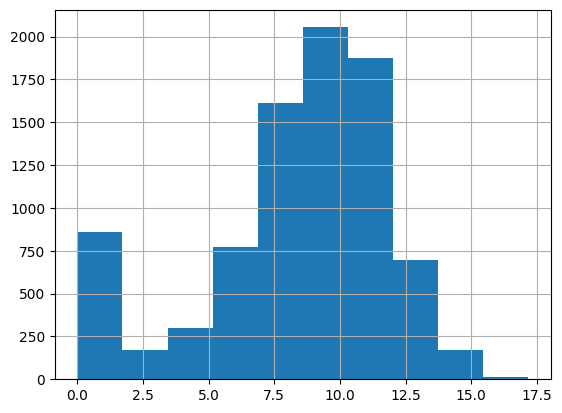

In [5]:
np.log(df.diff_loca_mark+1).hist()

In [6]:
temp = df[np.log(df.diff_loca_mark+1) > 15] 
temp_corpo = temp.account_id.unique() # 16, can be analyse manually
len(temp_corpo)

17

In [7]:
# manual changes due to handmaid analysis. 
df.loc[df["account_id"] == 16109, "CDP_CF2_market"] = [36394.18, 49184.59, 290433.97, 274570.05]
df.loc[4570, "CDP_CF2_market"] = 2804630.0
df.loc[8565, "CDP_CF2_location"] = np.nan
df.loc[8565, "CDP_CF2_market"] = np.nan
df.loc[13558, "CDP_CF2_market"] = np.nan
df.loc[13099, "CDP_CF2_market"] = np.nan
df.loc[14903, "CDP_CF2_location"] = 1043144 
df.loc[18660, "CDP_CF2_market"] = np.nan
df.loc[18660, "CDP_CF3"] = np.nan
df.loc[25154, "CDP_CF2_market"] = np.nan

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
df.boundary.value_counts() # best : C10, operational control, CF3 relevance = 1, data quality too low before 2018 ? 

Operational control    16338
Financial control       5499
Equity share             639
Name: boundary, dtype: int64

<AxesSubplot: >

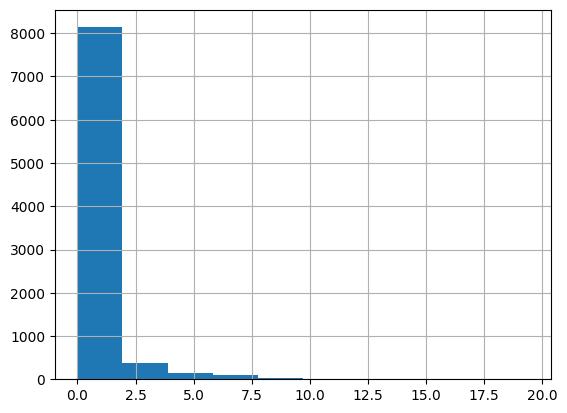

In [10]:
scope= "CDP_CF1"
df_temp = df[df[scope]>1]
np.log(df_temp.groupby("account_id")["CDP_CF1"].agg(lambda x : x.max()/x.min())).hist()

In [11]:
a = df_temp.groupby("account_id")["CDP_CF1"].agg(lambda x : x.max()/x.min())
acc_suspicious_CF1 = df[df.account_id.isin(a[a>1000].index)].account_id # outliers after 7 on plot, exp(7) = 1000

In [12]:
acc_suspicious_CF1.nunique() # too long (and too hot?) for Thibaud to handle

94

In [120]:
df[df.account_id==acc_suspicious_CF1.unique()[0]]

,unique_id,account_id,account_name,country,ticker,isin,accounting_year,boundary,CDP_CF1,CDP_CF2_location,covered_countries,CDP_CF3,CF3_relevance,CDP_CF2_market,activity,sector,industry,questionnaire_year,final_id,diff_loca_mark
207,1962_2014,1962,Bodycote plc,United Kingdom,BOY LN,GB00B3FLWH99,2014,Financial control,"158,169.00","213,481.00",Austria; Belgium; Canada; Czech Republic; Denm...,NaN,0.00,NaN,Fabricated metal components,Metal products manufacturing,Manufacturing,2015,1962_2014.0_2015,NaN
3778,1962_2015,1962,Bodycote plc,United Kingdom,BOY LN,GB00B3FLWH99,2015,Operational control,147.80,204.50,Austria; Belgium; Canada; Czech Republic; Denm...,"5,007.58",0.33,NaN,Fabricated metal components,Metal products manufacturing,Manufacturing,2016,1962_2015.0_2016,NaN
7554,1962_2016,1962,Bodycote plc,United Kingdom,BOY LN,GB00B3FLWH99,2016,Operational control,"137,549.88","184,019.42",Austria; Belgium; Canada; Czech Republic; Denm...,"5,006.58",0.33,NaN,Fabricated metal components,Metal products manufacturing,Manufacturing,2017,1962_2016.0_2017,NaN
15870,1962_2019,1962,Bodycote plc,United Kingdom,BOY LN,GB00B3FLWH99,2019,Operational control,"142,600.00","174,618.00",Austria; Belgium; Canada; Czech Republic; Denm...,NaN,0.00,NaN,Fabricated metal components,Metal products manufacturing,Manufacturing,2020,1962_2019.0_2020,NaN
18436,1962_2020,1962,Bodycote plc,United Kingdom,BOY LN,GB00B3FLWH99,2020,Operational control,"140,412.00","150,253.00",Austria; Belgium; Canada; Czech Republic; Denm...,NaN,0.00,NaN,Metal processing,"Metal smelting, refining & forming",Materials,2021,1962_2020.0_2021,NaN


In [13]:
# to be done manually
df.loc[126, "CDP_CF3"] = np.nan
df.loc[3711, "CDP_CF3"] = np.nan
df.loc[11484, "CDP_CF1"] = 35317.54

81


<AxesSubplot: >

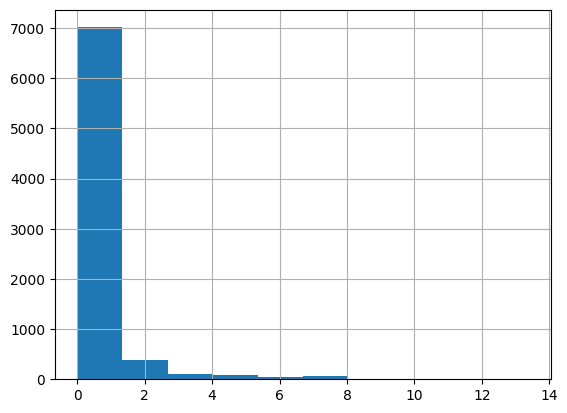

In [19]:
scope= "CDP_CF2_location"
df_temp = df[df[scope]>1]

a = df_temp.groupby("account_id")[scope].agg(lambda x : x.max()/x.min())
acc_suspicious_CF2 = df[df.account_id.isin(a[a>500].index)].account_id # outliers after 6 on plot, exp(6) = 500, 
print(acc_suspicious_CF2.nunique())
np.log(df_temp.groupby("account_id")[scope].agg(lambda x : x.max()/x.min())).hist()

136


<AxesSubplot: >

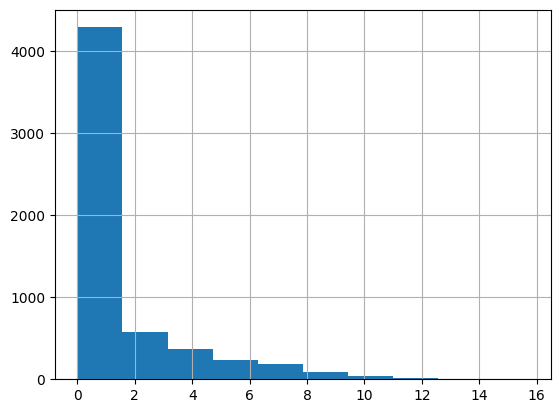

In [21]:
scope= "CDP_CF3"
df_temp = df[df[scope]>1]

a = df_temp.groupby("account_id")[scope].agg(lambda x : x.max()/x.min())
acc_suspicious_CF3 = df[df.account_id.isin(a[a>3000].index)].account_id # outliers after 8 on plot, exp(8) = 3000,
print(acc_suspicious_CF3.nunique())
np.log(df_temp.groupby("account_id")[scope].agg(lambda x : x.max()/x.min())).hist()

In [22]:
df[(df.CDP_CF1.notna()) | (df.CDP_CF2_location.notna()) | (df.CDP_CF3.notna())].account_id.nunique()

10213

In [23]:
df_filtered = df[~(df.account_id.isin(acc_suspicious_CF1))]
df_filtered = df_filtered[~(df_filtered.account_id.isin(acc_suspicious_CF2))]
df_filtered = df_filtered[~(df_filtered.account_id.isin(acc_suspicious_CF3))]
df_filtered = df_filtered[(df_filtered.CDP_CF1.notna()) | (df_filtered.CDP_CF2_location.notna()) | (df_filtered.CDP_CF3.notna())]
df_filtered.account_id.nunique()

9940

In [24]:
df_filtered = df_filtered[df_filtered.accounting_year >= 2014]

<AxesSubplot: >

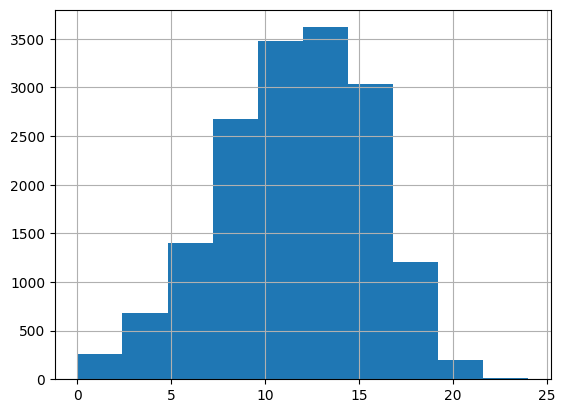

In [25]:
np.log(df_filtered.CDP_CF3+1).hist() # all distrib looks fair enough

In [26]:
df_filtered.to_excel("CDP_filtered_for_CGEE_V1.xlsx",index=False)